# Dendrograma

O gráfico dendrograma é uma espécie de gráfico de árvore que é muito usado para agrupar diferentes objetos com características similares entre si, cada ramo possui itens que apresentam semelhanças. Essas semelhanças são calculadas através de uma matriz de distâncias. O tutorial abaixo é baseado em um que pode ser encontrado no link: https://python-graph-gallery.com/400-basic-dendrogram/

Abaixo as bibliotecas necessárias para a criação do gráfico são carregadas.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

No passo seguinte os dados são carregados e guardados na variável `url`. Os dados do exemplo são relacionados a carros, então existem valores de milhas por galão, quantidade de cilindros, deslocamento do motor (cilindrada), potência em cavalos, relação do eixo traseiro, peso, tempo no 1/4 de milha, arquitetura do motor (V = 0, L = 1), se é automático ou manual, quantas marchas tem e a quantidade de carburadores. É importante lembrar que esses dados são de 1973 e 1974.

In [2]:
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Abaixo é usado o método "ward", mas pode-se usar também:
* *single* calcula: $$d(u,v) = min(dist(u[i], v[j]))$$
para todos os pontos $i$ no agrupamento $u$ e $j$ no cluster $v$.
* *complete* calcula: $$d(u,v) = max(dist(u[i], v[j]))$$
para todos os pontos $i$ no agrupamento $u$ e $j$ no cluster $v$.
* *average* calcula: $$d(u,v) = \sum_{ij}\frac{d(u[i],v[j])}{(|u|*|v|)} $$
esse todos os pontos $i$ e $j$ onde $|u|$ e $|v|$ são

In [0]:
# no lugar de ward também pode ser usado centroid, weighted, average, complete, single
Z = linkage(df, 'ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 5.147341546856977, 5.147341546856977, 0.0],
  [0.0, 10.201299345344859, 10.201299345344859, 5.147341546856977],
  [0.0, 16.89707975262787, 16.89707975262787, 10.201299345344859],
  [0.0, 8.65359029536296, 8.65359029536296, 0.0],
  [0.0, 14.21755048053871, 14.21755048053871, 8.65359029536296],
  [0.0, 19.89440928586052, 19.89440928586052, 14.21755048053871],
  [0.0, 30.38720376243924, 30.38720376243924, 19.89440928586052],
  [0.0, 41.765577612830086, 41.765577612830086, 30.38720376243924],
  [0.0, 62.39473420394505, 62.39473420394505, 41.765577612830086],
  [0.0, 0.6153251173160401, 0.6153251173160401, 0.0],
  [0.0, 1.5231546211727793, 1.5231546211727793, 0.0],
  [0.6153251173160401, 21.8609037438986, 21.8609037438986, 1.5231546211727793],
 

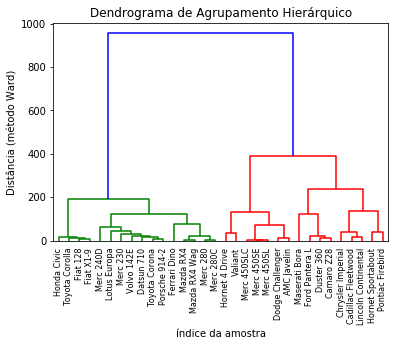

In [4]:
plt.title('Dendrograma de Agrupamento Hierárquico')
plt.xlabel('índice da amostra')
plt.ylabel('Distância (método Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90)